In [ ]:
from IPython.display import Image as Img
Img(filename="/project/2017/pawel/heatmap_Canada_allpages_1860-1869.png")

In [ ]:
Img(filename="/project/2017/pawel/heatmap_Canada_page1only_1860_1869.png")

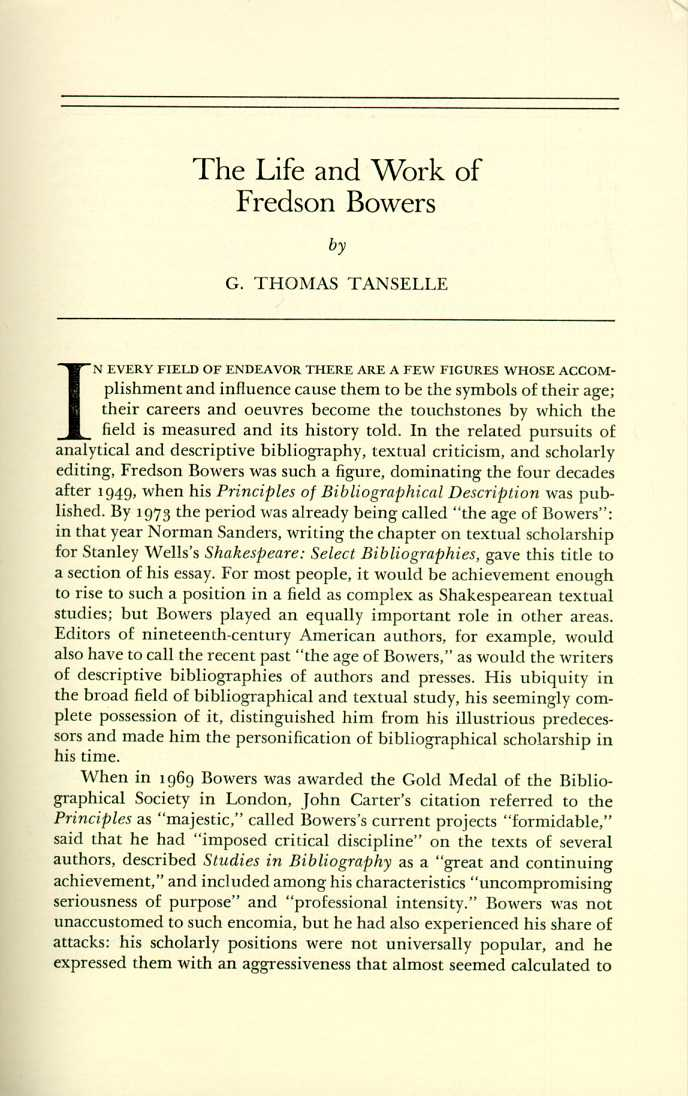

In [5]:
from IPython.display import Image as Img

Img(filename="/project/2017/pawel/sample_text.png")

In [6]:
! tesseract /project/2017/pawel/sample_text.png stdout

 

 

The Life and Work of
Fredson Bowers

by
G. THOMAS TANSELLE

 

N even neon or enoeavoe rum Mu: a Few naUREs waose aeuoivi.
plishmenr and inlluenee cause them [a he die symbols oi rheir age;
lheir careers and oeuvres become the tullchstunes by which lhe
ﬁeld is measured and iLs hislory sold. In the related pursuils oi

analviieal and deseriplive bibliography, lexiual eriiieism, and seholarly
ediiing. Frcdson Bowers was such a ﬁgurc. dominaiing ihe four decades
aher i949, when his Principles of Bibliogmphilrnl Deseripuoa was pub-
lished. By X973 lhe period was already lacing ealled “die age nl Bowers”:
in shai year Norman Sanders, wriiing lhe ehaprer on Lexlllal scholarship
for Stanley Wells's Shakespeare: Seleel Bihliographiai, gave [his lllle lo
a section of his essay. For moss people. it would he aehievemem enough
to rise to such a posiiion in a ﬁeld as complex as Shakespearean textual
sludies; but Bowers played an equally inipnrrani role in ollier areas.
Edirors oi aineieenihee

In [7]:
import pytesseract


In [8]:
! pip install pytesseract           

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import pytesseract
from PIL import Image
im=Image.open('/project/2017/pawel/sample_text.png')
resultOCR=pytesseract.image_to_string(im)
print(resultOCR)

The Life and Work of
Fredson Bowers

by
G. THOMAS TANSELLE

 

N even neon or enoeavoe rum Mu: a Few naUREs waose aeuoivi.
plishmenr and inlluenee cause them [a he die symbols oi rheir age;
lheir careers and oeuvres become the tullchstunes by which lhe
ﬁeld is measured and iLs hislory sold. In the related pursuils oi

analviieal and deseriplive bibliography, lexiual eriiieism, and seholarly
ediiing. Frcdson Bowers was such a ﬁgurc. dominaiing ihe four decades
aher i949, when his Principles of Bibliogmphilrnl Deseripuoa was pub-
lished. By X973 lhe period was already lacing ealled “die age nl Bowers”:
in shai year Norman Sanders, wriiing lhe ehaprer on Lexlllal scholarship
for Stanley Wells's Shakespeare: Seleel Bihliographiai, gave [his lllle lo
a section of his essay. For moss people. it would he aehievemem enough
to rise to such a posiiion in a ﬁeld as complex as Shakespearean textual
sludies; but Bowers played an equally inipnrrani role in ollier areas.
Edirors oi aineieeniheenlury 

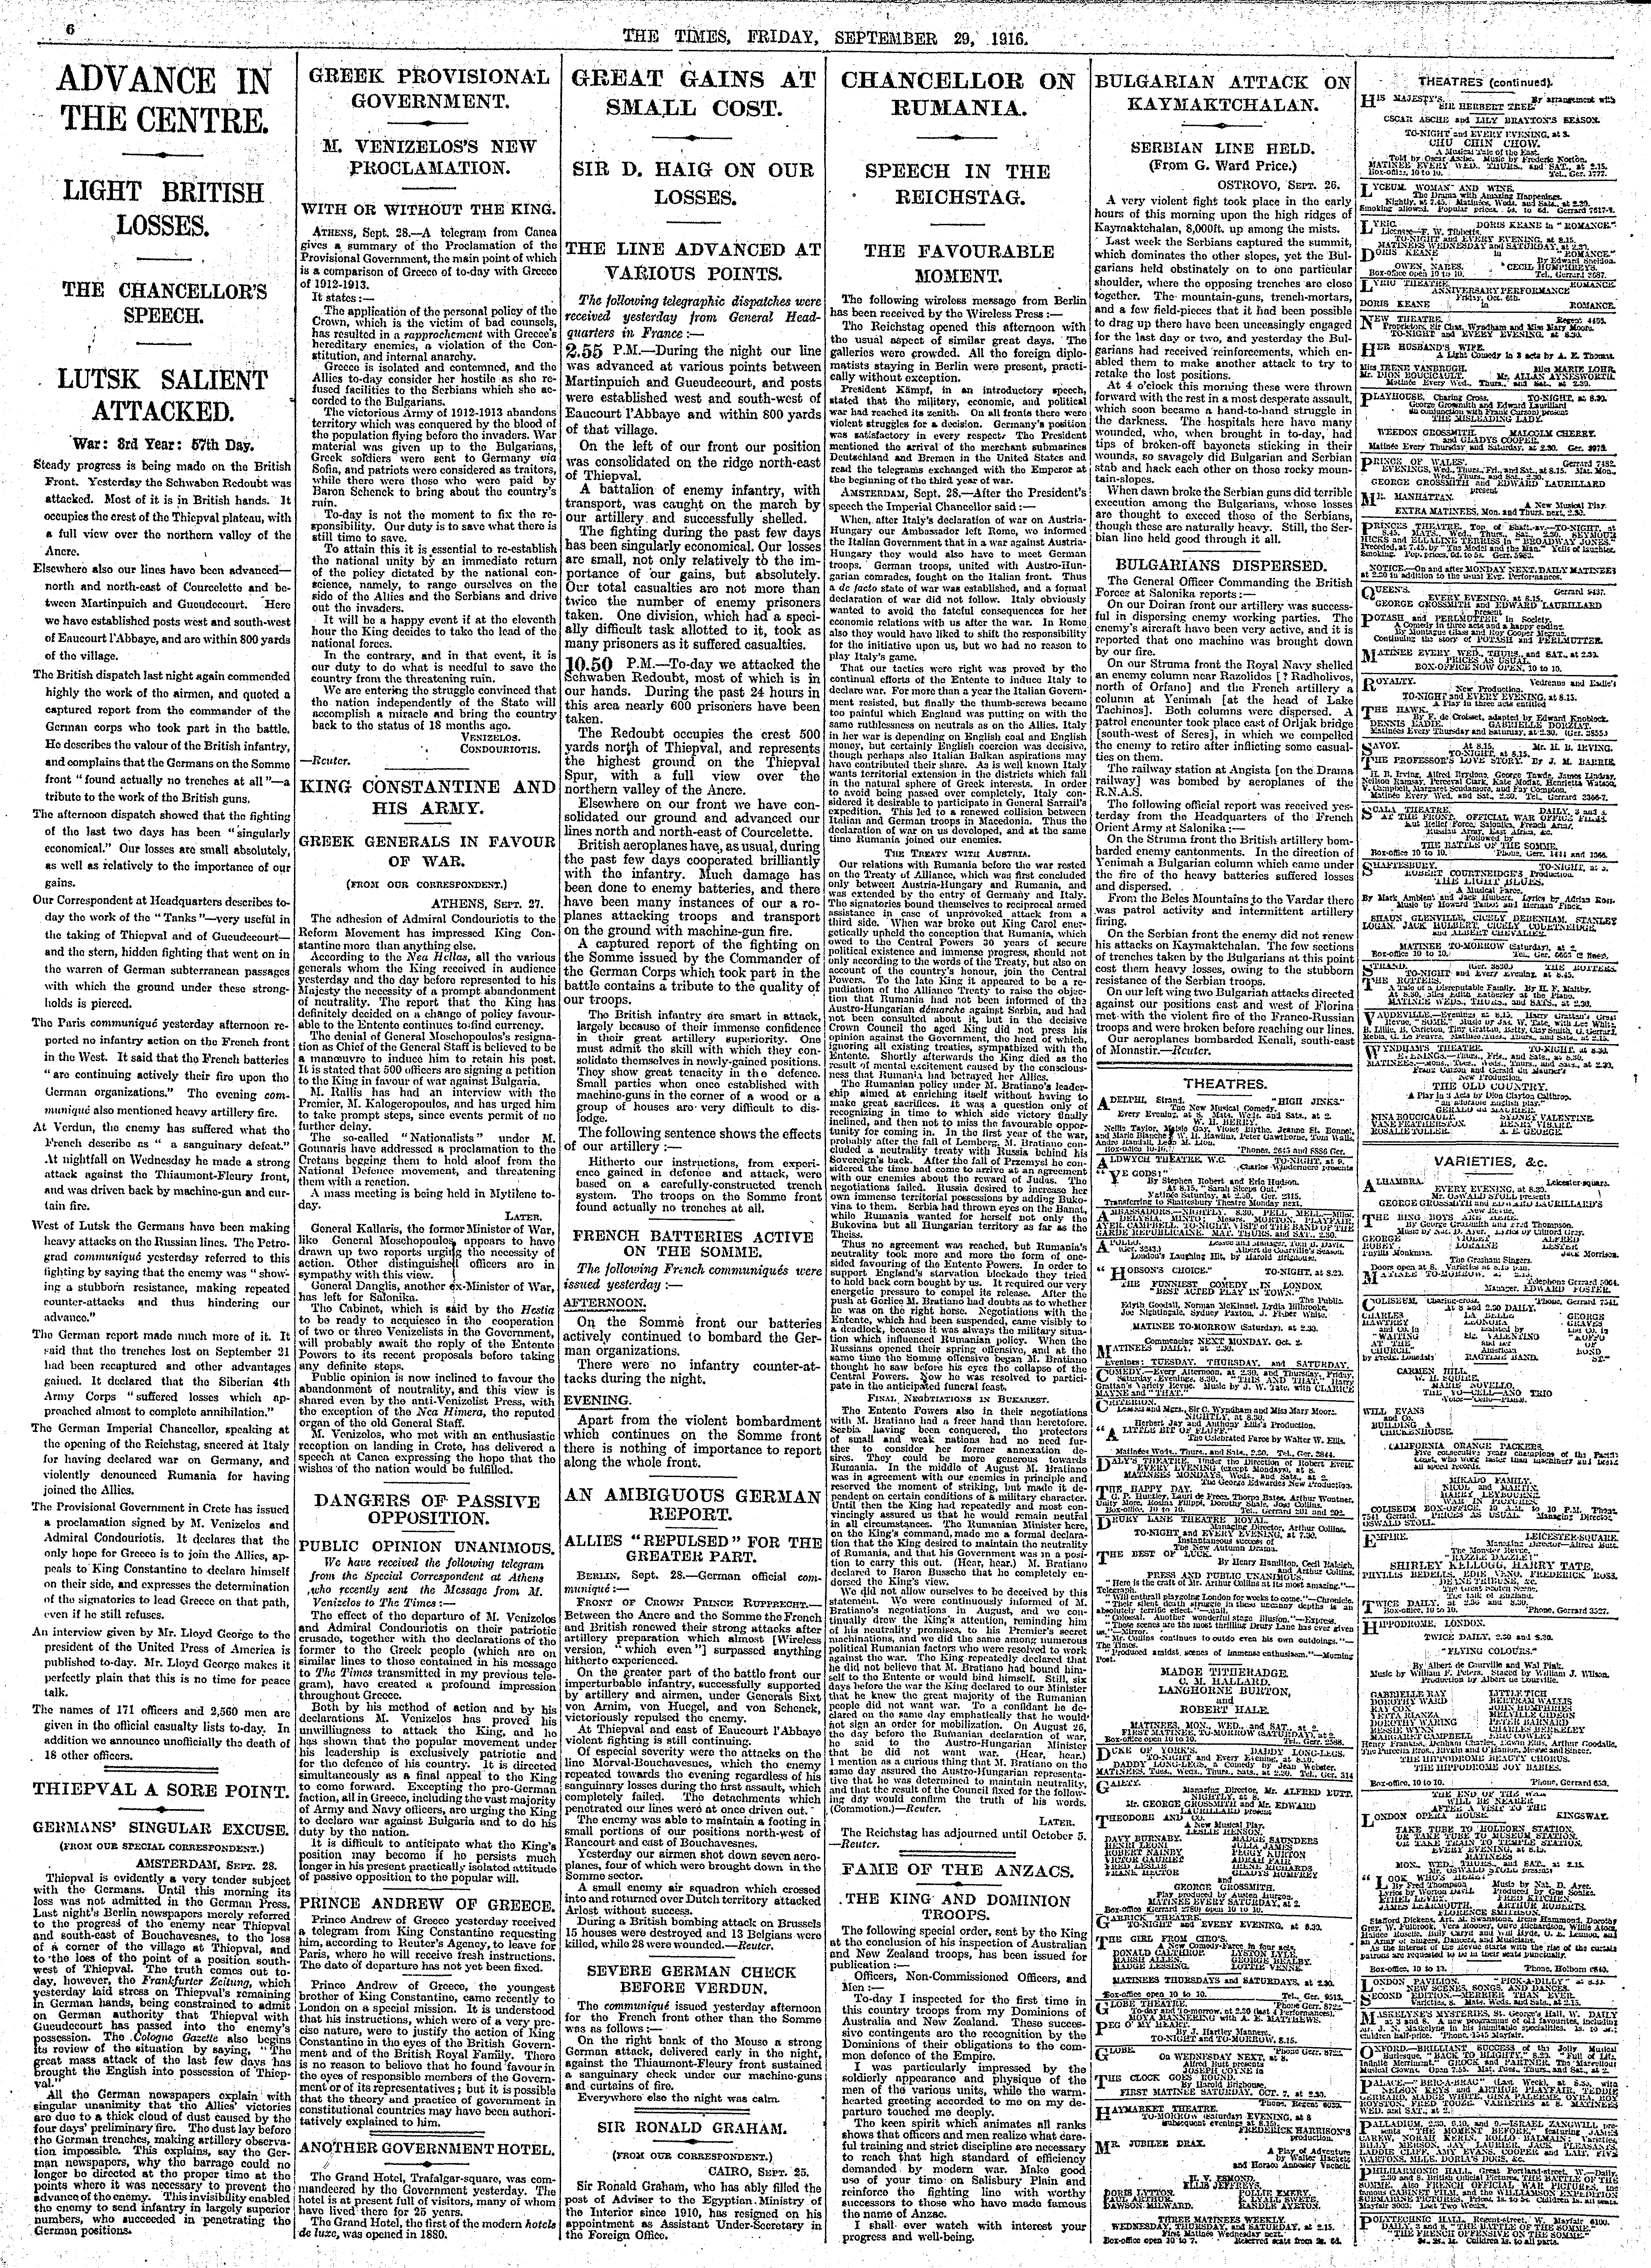

In [10]:
tmpfile='view_image.png'
im = Image.open('/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29-006.tif')
im.save(tmpfile)
Img(filename=tmpfile)

In [11]:
! grep Somme /project/2017/pawel/output_0FFO-1916-SEP29-006.txt

and complains that the Germans on the Somme
the Somme issued by the Commander of
system. The troops on. the Somme front
0n the Somme front our batteries
which continues on the Somme front
Between the Ancrc and the Somme the French
Somme sector. =
for the French front other than the Somme
some time the Somme offensive began M. Broth-mo


In [12]:
! grep Somme /project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29.xml

In [26]:
from bs4 import BeautifulSoup

def process_file(f):
    
    output_list=[]
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist:
        termfound=False
        pageinfo=tagtxt.find_all("pg")
        words = tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                #print("Found")
                
        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox)
                pagenumber=p["pgref"]
                imagefile=f.name.strip(".xml")+"-"+pagenumber.zfill(3)+".tif"
                #print(imagefile)
                im = Image.open(imagefile)
                im_cropped = im.crop(textbox)
                im_cropped.save("image_for_ocr.png")
                textOCR = pytesseract.image_to_string(im_cropped)
                #print(textOCR)
                print("number found by tesseract",textOCR.count(searchterm))
                output_list.append([imagefile,textbox])
                
    return output_list

searchterm="Somme"
f=open("/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29.xml",encoding="iso-8859-1")
outputlist=process_file(f)
f.close()

number found by tesseract 0
number found by tesseract 7


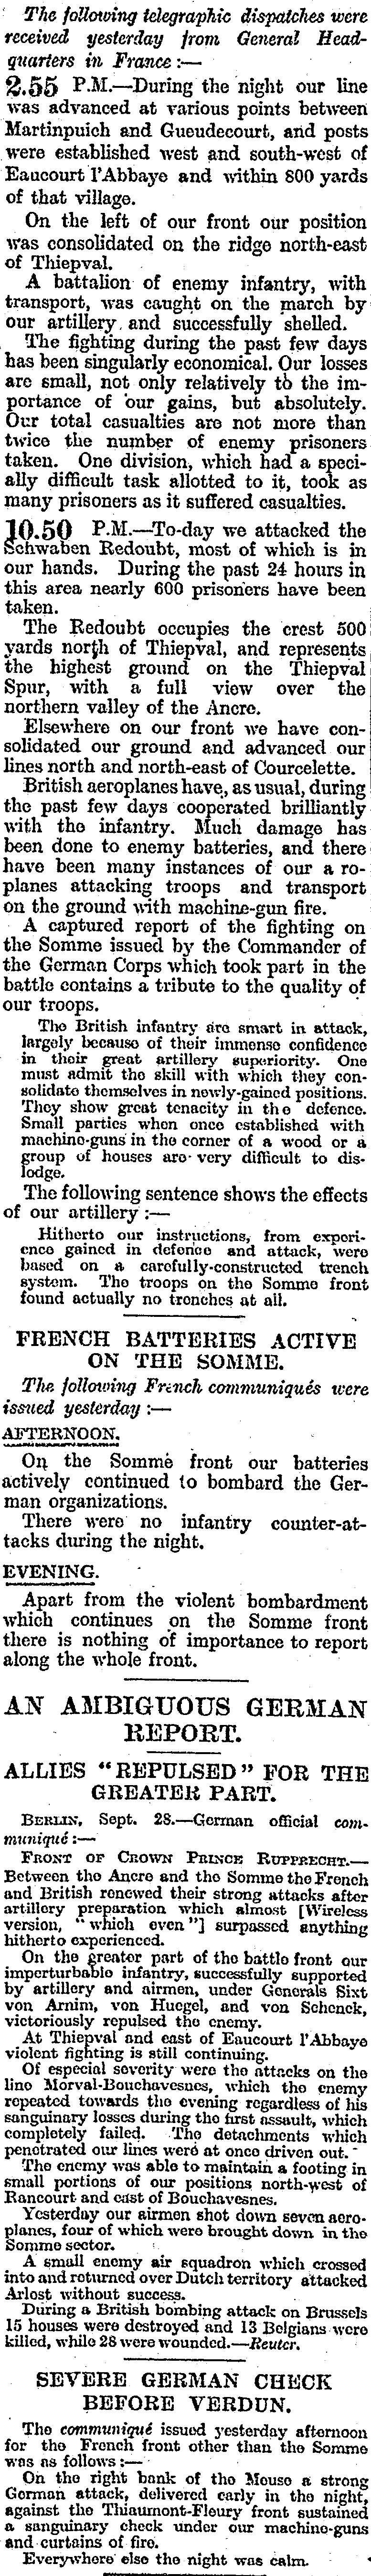

In [24]:
Img(filename='image_for_ocr.png')

# Restructure your code to fit Spark

In [ ]:
from bs4 import BeautifulSoup
from PIL import Image
import pytesseract

def process_file(f):
    
    output_list=[]
    
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist: 
        pageinfo=tagtxt.find_all("pg")
        
# check if search term occurs in text tag
        termfound=False
        words=tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                print("FOUND")

        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox) # convert 4 strings to 4 integers
                pagenumber=p["pgref"]
                imagefile=f.name.strip(".xml")+"-"+pagenumber.zfill(3)+".tif"
                output_list.append([imagefile,textbox ])
            
    return output_list

def process_image_file(fim):
    
    list_of_boxes=[]
    for element in output_list:
        if element[0]==fim.name:
            list_of_boxes.append(element[1])
    
    totalfound=0
    if( len(list_of_boxes)>0 ):
        
        im = Image.open(fim)        
        for box in list_of_boxes:
            im_cropped = im.crop(box)
            textOCR = pytesseract.image_to_string(im_cropped)
            totalfound=totalfound+textOCR.count("Somme")
            
    return totalfound
            
searchterm = "Somme"
f=open("/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29.xml",encoding="iso-8859-1")
output_list=process_file(f)
f.close()
print(output_list)


file_image=open("/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29-006.tif","rb")
result=process_image_file(file_image)
file_image.close()

print("total found is ",result)

# Finally, actual Spark code

In [30]:
import pyspark
sc = pyspark.SparkContext()

In [37]:
from bs4 import BeautifulSoup
from PIL import Image
import io
import pytesseract

def process_file_spark(something):
    
    filename=something[0]
    f=something[1]
    output_list=[]
    
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist: 
        pageinfo=tagtxt.find_all("pg")
        
# check if search term occurs in text tag
        termfound=False
        words=tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                print("FOUND")

        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox) # convert 4 strings to 4 integers
                pagenumber=p["pgref"]
                imagefile=filename.strip(".xml")+"-"+pagenumber.zfill(3)+".tif"
                output_list.append([imagefile,textbox ])
            
    return output_list

def process_image_file_spark(something):
    
    filename=something[0]
    list_of_boxes=[]
    for element in output_list:
        for element1 in element:
            if element1[0]==filename:
                list_of_boxes.append(element1[1])
    
    totalfound=0

    if( len(list_of_boxes)>0 ):
        image_data=io.BytesIO(something[1])
        im=Image.open(image_data)
        
        for box in list_of_boxes:
            im_cropped = im.crop(box)
            textOCR = pytesseract.image_to_string(im_cropped)
            totalfound=totalfound+textOCR.count(searchterm)
    return filename,totalfound

import time
t0 = time.time()

searchterm = "Somme"

#xmlfiles=sc.wholeTextFiles('/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29.xml')
xmlfiles=sc.wholeTextFiles('/project/datasets/PageScans/1916/1916092[0-9]/*.xml')

xmlfiles.cache()
output=xmlfiles.map(process_file_spark)
output.cache()
output_list=output.collect()

files=output.flatMap(lambda el:el).map(lambda el:el[0]).distinct().collect()
    
#imgfiles=sc.binaryFiles(','.join(files),800)
imgfiles=sc.binaryFiles('/project/datasets/PageScans/1916/1916[0-9][0-9][0-9][0-9]/*.tif')\
         .filter(lambda el:el[0] in files)

print("getNumPartitions",imgfiles.getNumPartitions())
print(imgfiles.count())

globalcount = imgfiles.map(process_image_file_spark)
print("count is ",globalcount.collect())
t1 = time.time()
print("total time was ",t1-t0)

getNumPartitions 32
15
count is  [('file:/project/datasets/PageScans/1916/19160920/0FFO-1916-SEP20-007.tif', 4), ('file:/project/datasets/PageScans/1916/19160920/0FFO-1916-SEP20-008.tif', 5), ('file:/project/datasets/PageScans/1916/19160927/0FFO-1916-SEP27-007.tif', 8), ('file:/project/datasets/PageScans/1916/19160927/0FFO-1916-SEP27-008.tif', 4), ('file:/project/datasets/PageScans/1916/19160922/0FFO-1916-SEP22-006.tif', 8), ('file:/project/datasets/PageScans/1916/19160921/0FFO-1916-SEP21-008.tif', 5), ('file:/project/datasets/PageScans/1916/19160925/0FFO-1916-SEP25-012.tif', 4), ('file:/project/datasets/PageScans/1916/19160925/0FFO-1916-SEP25-008.tif', 5), ('file:/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29-006.tif', 7), ('file:/project/datasets/PageScans/1916/19160928/0FFO-1916-SEP28-007.tif', 1), ('file:/project/datasets/PageScans/1916/19160928/0FFO-1916-SEP28-009.tif', 5), ('file:/project/datasets/PageScans/1916/19160928/0FFO-1916-SEP28-008.tif', 7), ('file:/project/da

In [35]:
sc.stop()

In [36]:
conf = pyspark.SparkConf().set("spark.executor.memory", "13g")
sc = pyspark.SparkContext(master='spark://compute7.paul:7077', conf=conf)

In [38]:
pwd

'/project/2017/pawel'